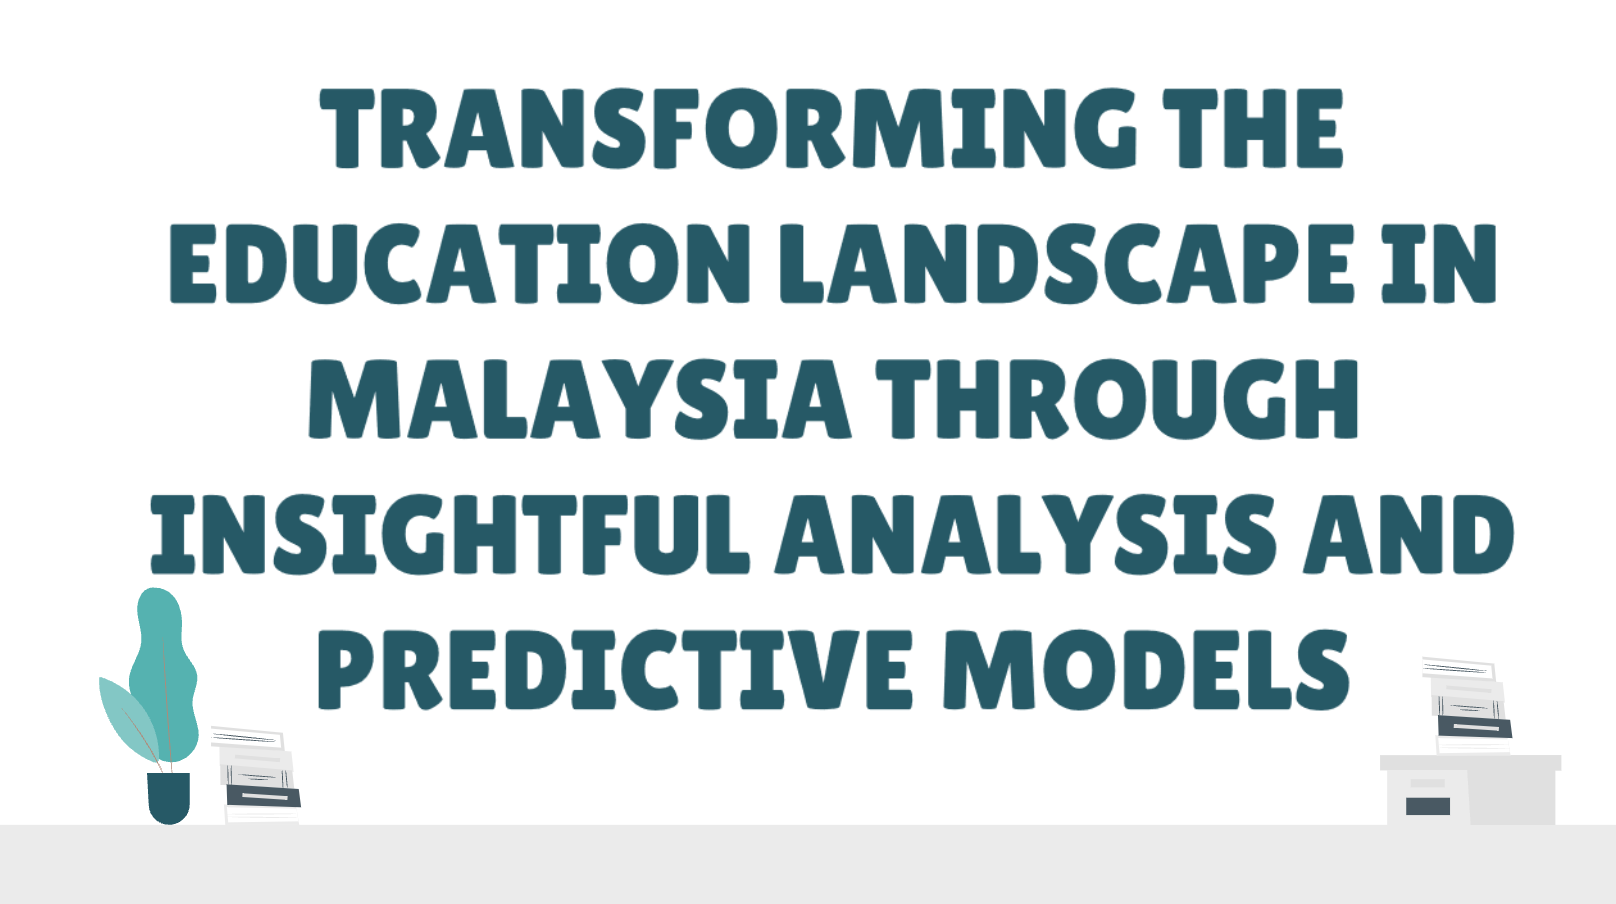

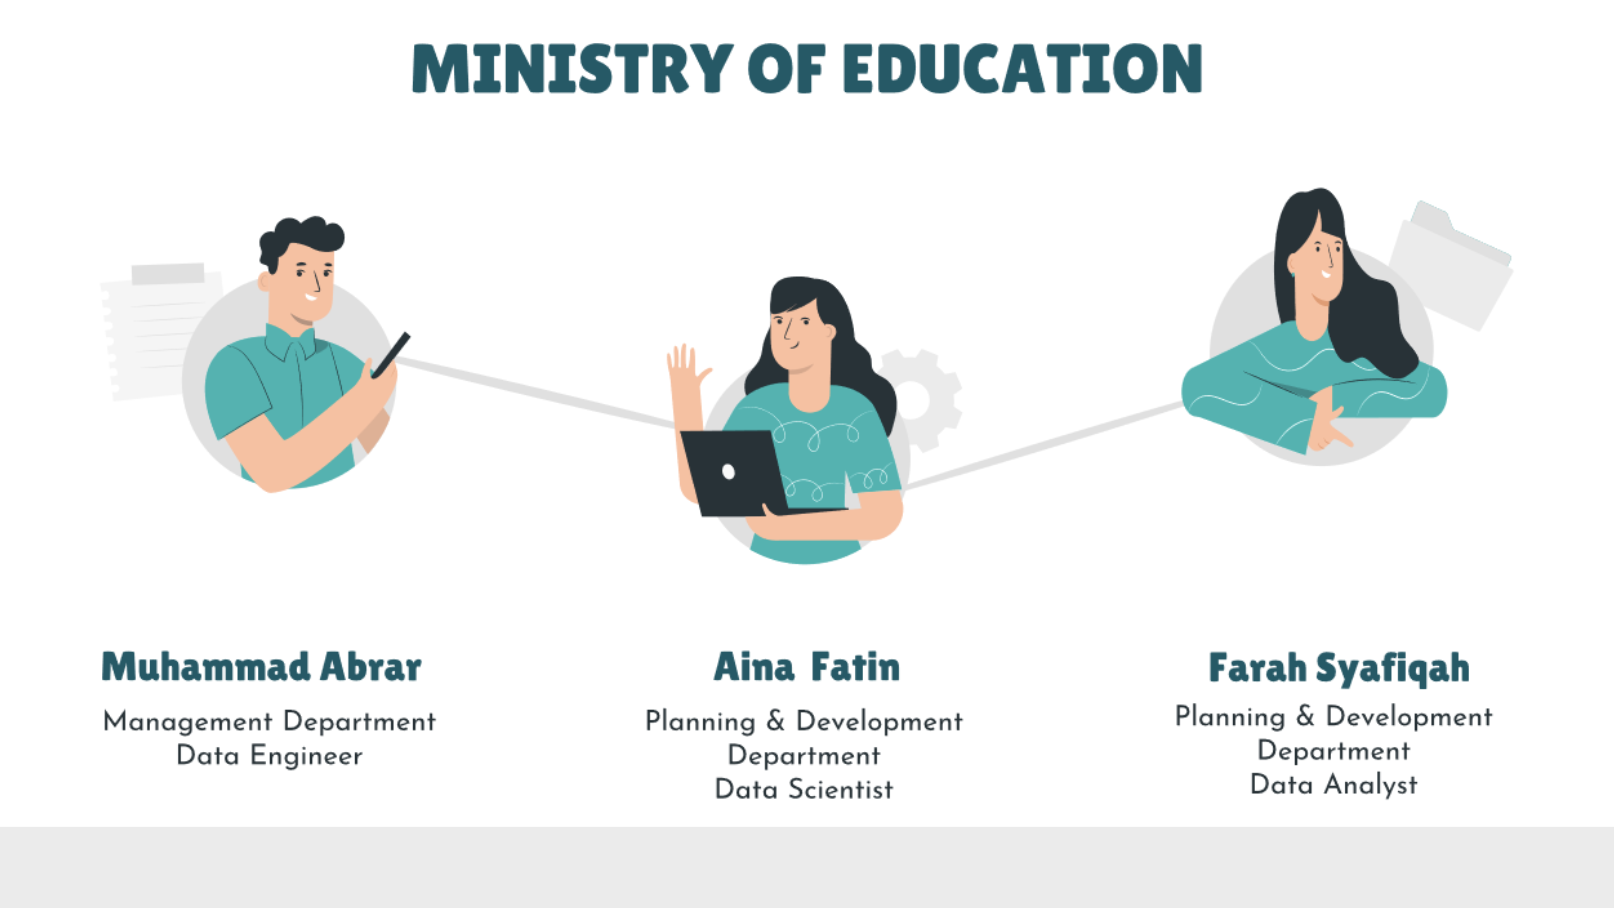

## Objectives

1. Resource Allocation
  * Identify resource gaps for optimal allocation by analyzing the relationships between students, teachers, and classrooms
2. Planning and Development
  * Identify areas for targeted interventions by examining the correlations between students, teachers, and classrooms
3. Future Planning
  * Ensure infrastructure development is well-equipped based on predictive insights of student and teacher count

# Import Libraries and Load Data



*   Import essential Python libraries such as pandas, numpy, matplotlib, seaborn, and sklearn
*   Load the School dataset from an Excel file into a pandas DataFrame



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
schools = pd.read_excel("/content/SekolahMalaysia_Sept2023.xlsx")
schools

,NEGERI,PPD,PERINGKAT,JENIS/LABEL,KODSEKOLAH,NAMASEKOLAH,ALAMATSURAT,POSKODSURAT,BANDARSURAT,NOTELEFON,...,ENROLMEN PRASEKOLAH,INTEGRASI,KOORDINATXX,KOORDINATYY,SKM<=150,BILIK DARJAH,BILANGAN KELAS,SESI,JUMLAH MURID PEREMPUAN,JUMLAH MURID LELAKI
0,PERAK,PPD BATANG PADANG,Rendah,SK,ABA0001,SEKOLAH KEBANGSAAN TOH TANDEWA SAKTI,JALAN KELAB,35000,TAPAH,054011341,...,50,ADA,101.255932,4.196633,NaN,22,22,1 Sesi,253,284
1,PERAK,PPD BATANG PADANG,Rendah,SK,ABA0002,SEKOLAH KEBANGSAAN PENDITA ZA'BA,JALAN TAPAH ROAD,35400,TAPAH ROAD,054182740,...,50,TIADA,101.200617,4.178276,NaN,21,16,1 Sesi,234,258
2,PERAK,PPD BATANG PADANG,Rendah,SK,ABA0003,SEKOLAH KEBANGSAAN BANIR,BANIR,35400,TAPAH ROAD,01165750521,...,11,TIADA,101.181893,4.204361,YA,7,7,1 Sesi,23,26
3,PERAK,PPD BATANG PADANG,Rendah,SK,ABA0004,SEKOLAH KEBANGSAAN TEMOH,KAMPUNG TEMOH STESEN,35350,TEMOH,01165566954,...,25,TIADA,101.172819,4.235841,YA,8,7,1 Sesi,61,73
4,PERAK,PPD BATANG PADANG,Rendah,SK,ABA0005,SEKOLAH KEBANGSAAN CHENDERIANG,JALAN CHENDERIANG,35300,CHENDERIANG,054161461,...,25,TIADA,101.240556,4.267980,NaN,8,8,1 Sesi,103,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10209,SARAWAK,PPD SARATOK,Menengah,SMKA,YRA2201,SEKOLAH MENENGAH KEBANGSAAN AGAMA SARATOK,"PETI SURAT 183, JALAN ROBAN LAMA",95407,SARATOK,083436610,...,0,TIADA,111.337767,1.763628,NaN,30,24,1 Sesi,226,186
10210,SARAWAK,PPD SIBU,Menengah,SMKA,YRA3101,SEKOLAH MENENGAH KEBANGSAAN AGAMA SIBU (S),JALAN AIRPORT LAMA,96000,SIBU,6084312512,...,0,TIADA,111.840383,2.337200,NaN,24,24,1 Sesi,371,282
10211,SARAWAK,PPD DALAT,Menengah,SMKA,YRA3201,SEKOLAH MENENGAH KEBANGSAAN AGAMA IGAN,D/A PEJABAT PENDIDIKAN DAERAH DALAT,96300,DALAT,0102613201,...,0,TIADA,111.712617,2.824150,NaN,28,24,1 Sesi,302,252
10212,SARAWAK,PPD MIRI,Menengah,SMKA,YRA4101,SEKOLAH MENENGAH KEBANGSAAN AGAMA,"PETI SURAT 1387, MIRI",98007,MIRI,085429436,...,0,TIADA,113.955867,4.298633,NaN,33,32,1 Sesi,383,389


# Data Preparation and Feature Engineering




In [ ]:
schools.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10214 entries, 0 to 10213
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   NEGERI                  10214 non-null  object 
 1   PPD                     10214 non-null  object 
 2   PERINGKAT               10214 non-null  object 
 3   JENIS/LABEL             10214 non-null  object 
 4   KODSEKOLAH              10214 non-null  object 
 5   NAMASEKOLAH             10214 non-null  object 
 6   ALAMATSURAT             10211 non-null  object 
 7   POSKODSURAT             10214 non-null  int64  
 8   BANDARSURAT             10214 non-null  object 
 9   NOTELEFON               10192 non-null  object 
 10  NOFAX                   10149 non-null  object 
 11  EMAIL                   10212 non-null  object 
 12  LOKASI                  10214 non-null  object 
 13  GRED                    10214 non-null  object 
 14  BANTUAN                 10214 non-null

## Drop Columns

* Remove columns that are not relevant to the analysis

In [ ]:
schools.drop(['PPD','JENIS/LABEL','ALAMATSURAT','POSKODSURAT','BANDARSURAT','NOTELEFON','NOFAX','EMAIL','BANTUAN','PRASEKOLAH','ENROLMEN PRASEKOLAH','INTEGRASI','KOORDINATXX','KOORDINATYY','SKM<=150', 'BILANGAN KELAS'], axis=1, inplace=True)
schools.columns

Index(['NEGERI', 'PERINGKAT', 'KODSEKOLAH', 'NAMASEKOLAH', 'LOKASI', 'GRED',
       'ENROLMEN', 'GURU', 'BILIK DARJAH', 'SESI', 'JUMLAH MURID PEREMPUAN',
       'JUMLAH MURID LELAKI'],
      dtype='object')

## Derive Values

* Standardize the ratio of total students, female students, and male students per session

In [ ]:
schools['SESI'] = schools['SESI'].str.replace('Sesi','').str.strip().astype(int)
schools

,NEGERI,PERINGKAT,KODSEKOLAH,NAMASEKOLAH,LOKASI,GRED,ENROLMEN,GURU,BILIK DARJAH,SESI,JUMLAH MURID PEREMPUAN,JUMLAH MURID LELAKI
0,PERAK,Rendah,ABA0001,SEKOLAH KEBANGSAAN TOH TANDEWA SAKTI,Bandar,A,537,43,22,1,253,284
1,PERAK,Rendah,ABA0002,SEKOLAH KEBANGSAAN PENDITA ZA'BA,Bandar,A,492,37,21,1,234,258
2,PERAK,Rendah,ABA0003,SEKOLAH KEBANGSAAN BANIR,Bandar,SKM B,49,12,7,1,23,26
3,PERAK,Rendah,ABA0004,SEKOLAH KEBANGSAAN TEMOH,Bandar,B,134,17,8,1,61,73
4,PERAK,Rendah,ABA0005,SEKOLAH KEBANGSAAN CHENDERIANG,Luar Bandar,B,193,18,8,1,103,90
...,...,...,...,...,...,...,...,...,...,...,...,...
10209,SARAWAK,Menengah,YRA2201,SEKOLAH MENENGAH KEBANGSAAN AGAMA SARATOK,Luar Bandar,A,412,47,30,1,226,186
10210,SARAWAK,Menengah,YRA3101,SEKOLAH MENENGAH KEBANGSAAN AGAMA SIBU (S),Bandar,A,653,53,24,1,371,282
10211,SARAWAK,Menengah,YRA3201,SEKOLAH MENENGAH KEBANGSAAN AGAMA IGAN,Luar Bandar,A,554,48,28,1,302,252
10212,SARAWAK,Menengah,YRA4101,SEKOLAH MENENGAH KEBANGSAAN AGAMA,Bandar,A,772,65,33,1,383,389


In [ ]:
schools['BIL MURID PER SESI'] = (schools['ENROLMEN']/schools['SESI']).astype(int)
schools

,NEGERI,PERINGKAT,KODSEKOLAH,NAMASEKOLAH,LOKASI,GRED,ENROLMEN,GURU,BILIK DARJAH,SESI,JUMLAH MURID PEREMPUAN,JUMLAH MURID LELAKI,BIL MURID PER SESI
0,PERAK,Rendah,ABA0001,SEKOLAH KEBANGSAAN TOH TANDEWA SAKTI,Bandar,A,537,43,22,1,253,284,537
1,PERAK,Rendah,ABA0002,SEKOLAH KEBANGSAAN PENDITA ZA'BA,Bandar,A,492,37,21,1,234,258,492
2,PERAK,Rendah,ABA0003,SEKOLAH KEBANGSAAN BANIR,Bandar,SKM B,49,12,7,1,23,26,49
3,PERAK,Rendah,ABA0004,SEKOLAH KEBANGSAAN TEMOH,Bandar,B,134,17,8,1,61,73,134
4,PERAK,Rendah,ABA0005,SEKOLAH KEBANGSAAN CHENDERIANG,Luar Bandar,B,193,18,8,1,103,90,193
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10209,SARAWAK,Menengah,YRA2201,SEKOLAH MENENGAH KEBANGSAAN AGAMA SARATOK,Luar Bandar,A,412,47,30,1,226,186,412
10210,SARAWAK,Menengah,YRA3101,SEKOLAH MENENGAH KEBANGSAAN AGAMA SIBU (S),Bandar,A,653,53,24,1,371,282,653
10211,SARAWAK,Menengah,YRA3201,SEKOLAH MENENGAH KEBANGSAAN AGAMA IGAN,Luar Bandar,A,554,48,28,1,302,252,554
10212,SARAWAK,Menengah,YRA4101,SEKOLAH MENENGAH KEBANGSAAN AGAMA,Bandar,A,772,65,33,1,383,389,772


In [ ]:
schools['BIL MURID PEREMPUAN PER SESI'] = (schools['JUMLAH MURID PEREMPUAN']/schools['SESI']).astype(int)
schools['BIL MURID LELAKI PER SESI'] = (schools['JUMLAH MURID LELAKI']/schools['SESI']).astype(int)
schools

,NEGERI,PERINGKAT,KODSEKOLAH,NAMASEKOLAH,LOKASI,GRED,ENROLMEN,GURU,BILIK DARJAH,SESI,JUMLAH MURID PEREMPUAN,JUMLAH MURID LELAKI,BIL MURID PER SESI,BIL MURID PEREMPUAN PER SESI,BIL MURID LELAKI PER SESI
0,PERAK,Rendah,ABA0001,SEKOLAH KEBANGSAAN TOH TANDEWA SAKTI,Bandar,A,537,43,22,1,253,284,537,253,284
1,PERAK,Rendah,ABA0002,SEKOLAH KEBANGSAAN PENDITA ZA'BA,Bandar,A,492,37,21,1,234,258,492,234,258
2,PERAK,Rendah,ABA0003,SEKOLAH KEBANGSAAN BANIR,Bandar,SKM B,49,12,7,1,23,26,49,23,26
3,PERAK,Rendah,ABA0004,SEKOLAH KEBANGSAAN TEMOH,Bandar,B,134,17,8,1,61,73,134,61,73
4,PERAK,Rendah,ABA0005,SEKOLAH KEBANGSAAN CHENDERIANG,Luar Bandar,B,193,18,8,1,103,90,193,103,90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10209,SARAWAK,Menengah,YRA2201,SEKOLAH MENENGAH KEBANGSAAN AGAMA SARATOK,Luar Bandar,A,412,47,30,1,226,186,412,226,186
10210,SARAWAK,Menengah,YRA3101,SEKOLAH MENENGAH KEBANGSAAN AGAMA SIBU (S),Bandar,A,653,53,24,1,371,282,653,371,282
10211,SARAWAK,Menengah,YRA3201,SEKOLAH MENENGAH KEBANGSAAN AGAMA IGAN,Luar Bandar,A,554,48,28,1,302,252,554,302,252
10212,SARAWAK,Menengah,YRA4101,SEKOLAH MENENGAH KEBANGSAAN AGAMA,Bandar,A,772,65,33,1,383,389,772,383,389


In [ ]:
schools.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10214 entries, 0 to 10213
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   NEGERI                        10214 non-null  object
 1   PERINGKAT                     10214 non-null  object
 2   KODSEKOLAH                    10214 non-null  object
 3   NAMASEKOLAH                   10214 non-null  object
 4   LOKASI                        10214 non-null  object
 5   GRED                          10214 non-null  object
 6   ENROLMEN                      10214 non-null  int64 
 7   GURU                          10214 non-null  int64 
 8   BILIK DARJAH                  10214 non-null  int64 
 9   SESI                          10214 non-null  int64 
 10  JUMLAH MURID PEREMPUAN        10214 non-null  int64 
 11  JUMLAH MURID LELAKI           10214 non-null  int64 
 12  BIL MURID PER SESI            10214 non-null  int64 
 13  BIL MURID PEREMP

In [ ]:
schools.drop(['ENROLMEN','JUMLAH MURID PEREMPUAN','JUMLAH MURID LELAKI','SESI'], axis=1, inplace=True)
schools.columns

Index(['NEGERI', 'PERINGKAT', 'KODSEKOLAH', 'NAMASEKOLAH', 'LOKASI', 'GRED',
       'GURU', 'BILIK DARJAH', 'BIL MURID PER SESI',
       'BIL MURID PEREMPUAN PER SESI', 'BIL MURID LELAKI PER SESI'],
      dtype='object')

## Rename Columns

* Replace columns with clear and consistent names

In [ ]:
schools.rename(columns={
    'NEGERI' : 'STATE',
    'PERINGKAT' : 'LEVEL',
    'KODSEKOLAH' : 'SCHOOL CODE',
    'NAMASEKOLAH' : 'SCHOOL NAME',
    'LOKASI' : 'LOCATION',
    'GRED' : 'GRADE',
    'GURU' : 'TEACHER',
    'BILIK DARJAH' : 'CLASSROOM',
    'BIL MURID PER SESI' : 'STUDENTS',
    'BIL MURID PEREMPUAN PER SESI' : 'FEMALE STUDENTS',
    'BIL MURID LELAKI PER SESI' : 'MALE STUDENTS',
    }, inplace=True
)

schools

,STATE,LEVEL,SCHOOL CODE,SCHOOL NAME,LOCATION,GRADE,TEACHER,CLASSROOM,STUDENTS,FEMALE STUDENTS,MALE STUDENTS
0,PERAK,Rendah,ABA0001,SEKOLAH KEBANGSAAN TOH TANDEWA SAKTI,Bandar,A,43,22,537,253,284
1,PERAK,Rendah,ABA0002,SEKOLAH KEBANGSAAN PENDITA ZA'BA,Bandar,A,37,21,492,234,258
2,PERAK,Rendah,ABA0003,SEKOLAH KEBANGSAAN BANIR,Bandar,SKM B,12,7,49,23,26
3,PERAK,Rendah,ABA0004,SEKOLAH KEBANGSAAN TEMOH,Bandar,B,17,8,134,61,73
4,PERAK,Rendah,ABA0005,SEKOLAH KEBANGSAAN CHENDERIANG,Luar Bandar,B,18,8,193,103,90
...,...,...,...,...,...,...,...,...,...,...,...
10209,SARAWAK,Menengah,YRA2201,SEKOLAH MENENGAH KEBANGSAAN AGAMA SARATOK,Luar Bandar,A,47,30,412,226,186
10210,SARAWAK,Menengah,YRA3101,SEKOLAH MENENGAH KEBANGSAAN AGAMA SIBU (S),Bandar,A,53,24,653,371,282
10211,SARAWAK,Menengah,YRA3201,SEKOLAH MENENGAH KEBANGSAAN AGAMA IGAN,Luar Bandar,A,48,28,554,302,252
10212,SARAWAK,Menengah,YRA4101,SEKOLAH MENENGAH KEBANGSAAN AGAMA,Bandar,A,65,33,772,383,389


## Replace Values

* Replace values from Malay to English for clarity

In [ ]:
schools['LOCATION'] = schools['LOCATION'].replace({'Bandar': 'Urban', 'Luar Bandar': 'Rural'})
schools['LEVEL'] = schools['LEVEL'].replace({'Rendah': 'Primary', 'Menengah': 'Secondary'})
schools

,STATE,LEVEL,SCHOOL CODE,SCHOOL NAME,LOCATION,GRADE,TEACHER,CLASSROOM,STUDENTS,FEMALE STUDENTS,MALE STUDENTS
0,PERAK,Primary,ABA0001,SEKOLAH KEBANGSAAN TOH TANDEWA SAKTI,Urban,A,43,22,537,253,284
1,PERAK,Primary,ABA0002,SEKOLAH KEBANGSAAN PENDITA ZA'BA,Urban,A,37,21,492,234,258
2,PERAK,Primary,ABA0003,SEKOLAH KEBANGSAAN BANIR,Urban,SKM B,12,7,49,23,26
3,PERAK,Primary,ABA0004,SEKOLAH KEBANGSAAN TEMOH,Urban,B,17,8,134,61,73
4,PERAK,Primary,ABA0005,SEKOLAH KEBANGSAAN CHENDERIANG,Rural,B,18,8,193,103,90
...,...,...,...,...,...,...,...,...,...,...,...
10209,SARAWAK,Secondary,YRA2201,SEKOLAH MENENGAH KEBANGSAAN AGAMA SARATOK,Rural,A,47,30,412,226,186
10210,SARAWAK,Secondary,YRA3101,SEKOLAH MENENGAH KEBANGSAAN AGAMA SIBU (S),Urban,A,53,24,653,371,282
10211,SARAWAK,Secondary,YRA3201,SEKOLAH MENENGAH KEBANGSAAN AGAMA IGAN,Rural,A,48,28,554,302,252
10212,SARAWAK,Secondary,YRA4101,SEKOLAH MENENGAH KEBANGSAAN AGAMA,Urban,A,65,33,772,383,389


## Missing Values

* Ensure there are no missing values in the dataset

In [ ]:
schools.isnull().sum()

STATE              0
LEVEL              0
SCHOOL CODE        0
SCHOOL NAME        0
LOCATION           0
GRADE              0
TEACHER            0
CLASSROOM          0
STUDENTS           0
FEMALE STUDENTS    0
MALE STUDENTS      0
dtype: int64

## Duplicate Values

* Ensure there are no duplicated values in the dataset

In [ ]:
schools.duplicated().sum()

0

## Check Data Types

* Review data types of each column to ensure they are appropriate for analysis
* Convert columns to the correct data types if necessary

In [ ]:
schools.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10214 entries, 0 to 10213
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   STATE            10214 non-null  object
 1   LEVEL            10214 non-null  object
 2   SCHOOL CODE      10214 non-null  object
 3   SCHOOL NAME      10214 non-null  object
 4   LOCATION         10214 non-null  object
 5   GRADE            10214 non-null  object
 6   TEACHER          10214 non-null  int64 
 7   CLASSROOM        10214 non-null  int64 
 8   STUDENTS         10214 non-null  int64 
 9   FEMALE STUDENTS  10214 non-null  int64 
 10  MALE STUDENTS    10214 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 877.9+ KB


# Data Description

* **State:** The state where the school is located
* **Level:** The level of education of the school (Primary/Secondary)
* **School Code:** The code of the school
* **School Name:** The corresponding name to the School Code
* **Location:** The location of the school (Urban/Rural)
* **Grade:** The categorical grade of the school (A/B/SKM A/SKM B)
* **Teacher:** The number of teachers in the school
* **Classroom:** The number of classrooms in the school
* **Students:** The number of students enrolled in the school
* **Male Students:** The number of male students in the school
* **Female Students:** The number of female students in the school

# Exploratory Data Analysis (EDA)

## Overview




### Summary Statistics of Numerical Variables

In [ ]:
schools.describe()

,TEACHER,CLASSROOM,STUDENTS,FEMALE STUDENTS,MALE STUDENTS
count,10214.000000,10214.000000,10214.000000,10214.000000,10214.000000
mean,40.015567,19.504699,416.551987,205.511455,211.012826
std,31.019926,12.602274,345.782203,178.394205,182.443551
min,0.000000,1.000000,0.000000,0.000000,0.000000
25%,16.000000,8.000000,134.000000,63.000000,64.250000
50%,30.000000,16.000000,323.500000,156.000000,160.000000
75%,55.750000,28.000000,625.750000,307.000000,318.000000
max,241.000000,137.000000,2702.000000,1375.000000,1995.000000


### Scatter Plots for All Variable Pairs


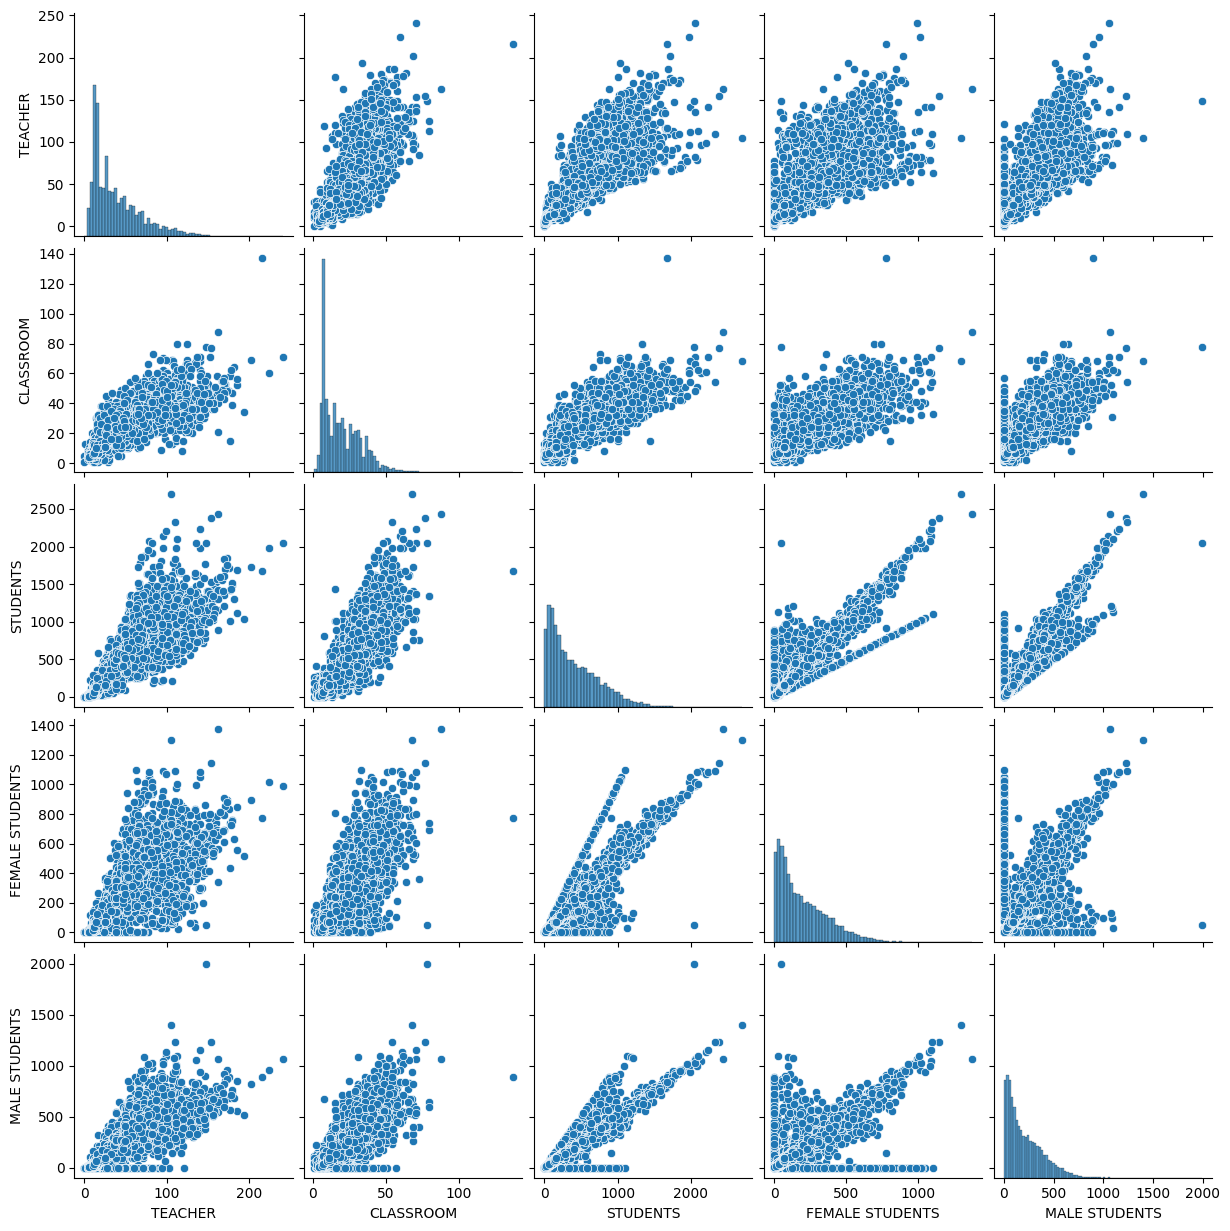

In [ ]:
sns.pairplot(schools)

### Correlation Matrix

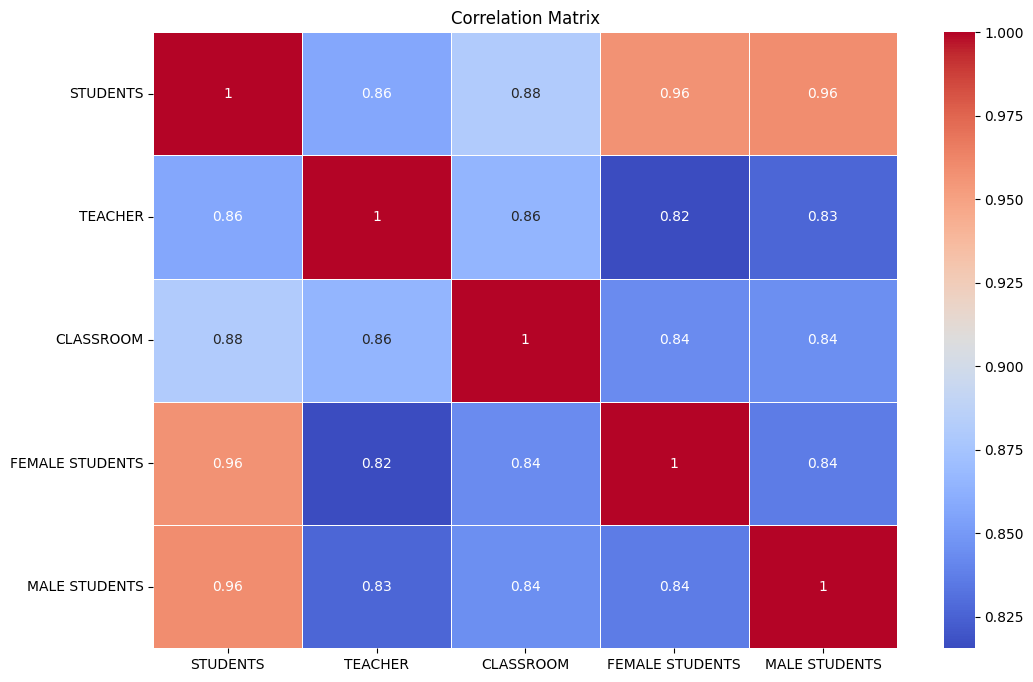

In [ ]:
plt.figure(figsize=(12, 8))
correlation_matrix = schools[['STUDENTS', 'TEACHER', 'CLASSROOM', 'FEMALE STUDENTS', 'MALE STUDENTS']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## Univariate Analysis

### Distribution of Total Students

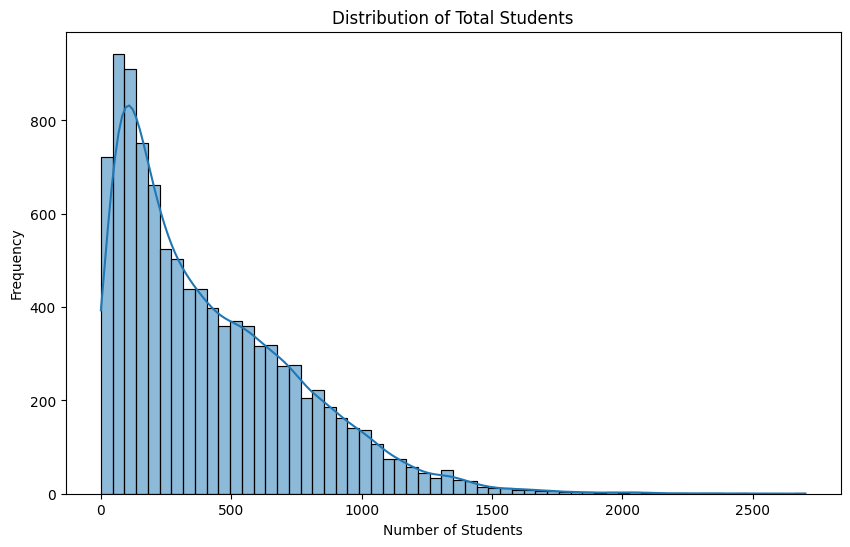

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(schools['STUDENTS'], kde=True)
plt.title('Distribution of Total Students')
plt.xlabel('Number of Students')
plt.ylabel('Frequency')
plt.show()

### Distribution of Teachers

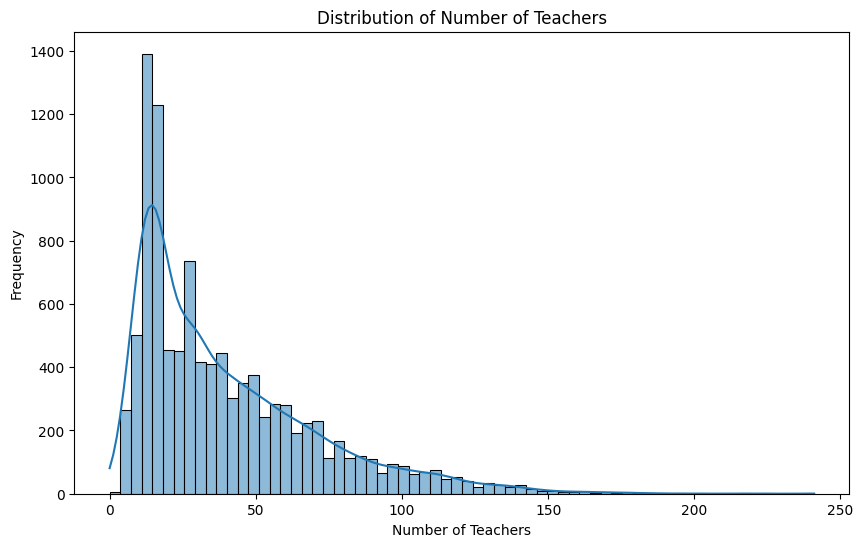

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(schools['TEACHER'], kde=True)
plt.title('Distribution of Number of Teachers')
plt.xlabel('Number of Teachers')
plt.ylabel('Frequency')
plt.show()

### Distribution of Classrooms

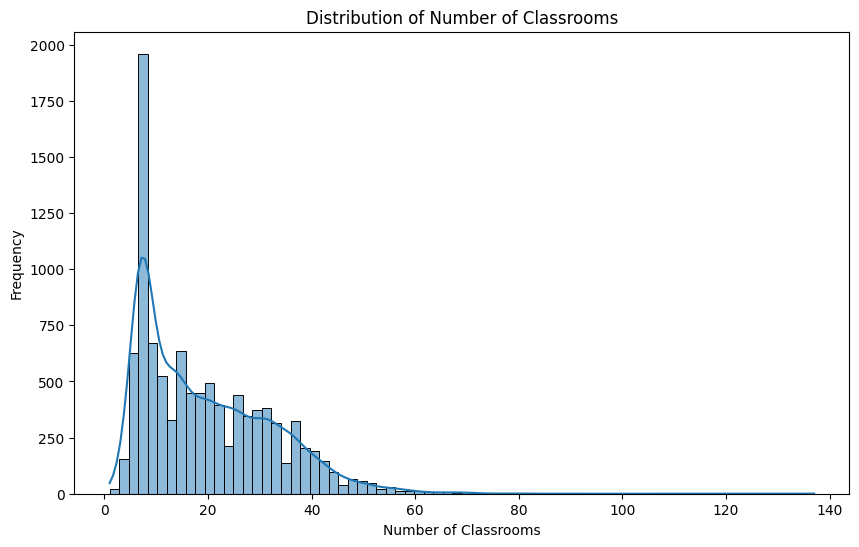

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(schools['CLASSROOM'], kde=True)
plt.title('Distribution of Number of Classrooms')
plt.xlabel('Number of Classrooms')
plt.ylabel('Frequency')
plt.show()

### Comparison of Male vs Female Students

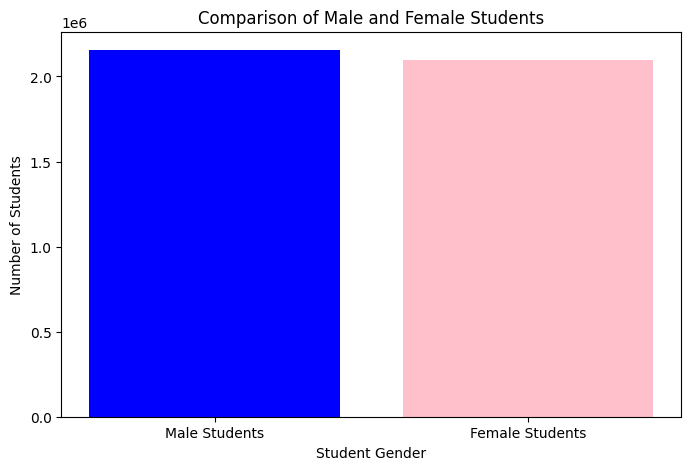

In [ ]:
categories = ['Male Students', 'Female Students']
values = [schools['MALE STUDENTS'].sum(), schools['FEMALE STUDENTS'].sum()]

plt.figure(figsize=(8, 5))
plt.bar(categories, values, color=['blue', 'pink'])
plt.xlabel('Student Gender')
plt.ylabel('Number of Students')
plt.title('Comparison of Male and Female Students')
plt.show()

### Pie Charts of Location, Level, and Grade of Schools

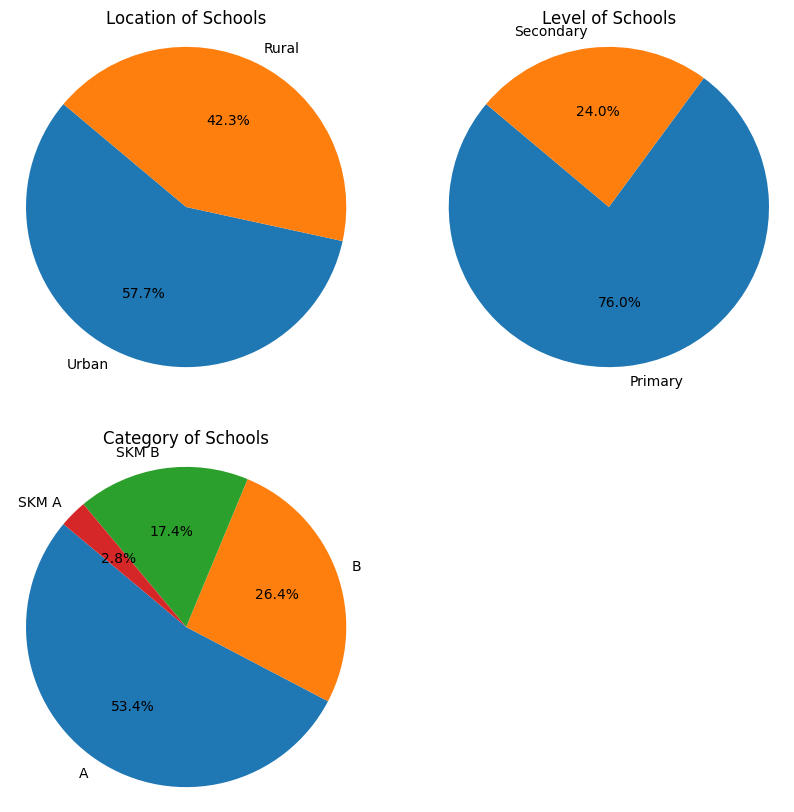

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

location_count = schools['LOCATION'].value_counts()
axs[0, 0].pie(location_count, labels=location_count.index, autopct='%1.1f%%', startangle=140)
axs[0, 0].axis('equal')
axs[0, 0].set_title('Location of Schools')

level_count = schools['LEVEL'].value_counts()
axs[0, 1].pie(level_count, labels=level_count.index, autopct='%1.1f%%', startangle=140)
axs[0, 1].axis('equal')
axs[0, 1].set_title('Level of Schools')

grade_count = schools['GRADE'].value_counts()
axs[1, 0].pie(grade_count, labels=grade_count.index, autopct='%1.1f%%', startangle=140)
axs[1, 0].axis('equal')
axs[1, 0].set_title('Category of Schools')

fig.delaxes(axs[1, 1])

plt.show()

### Count of Schools by State

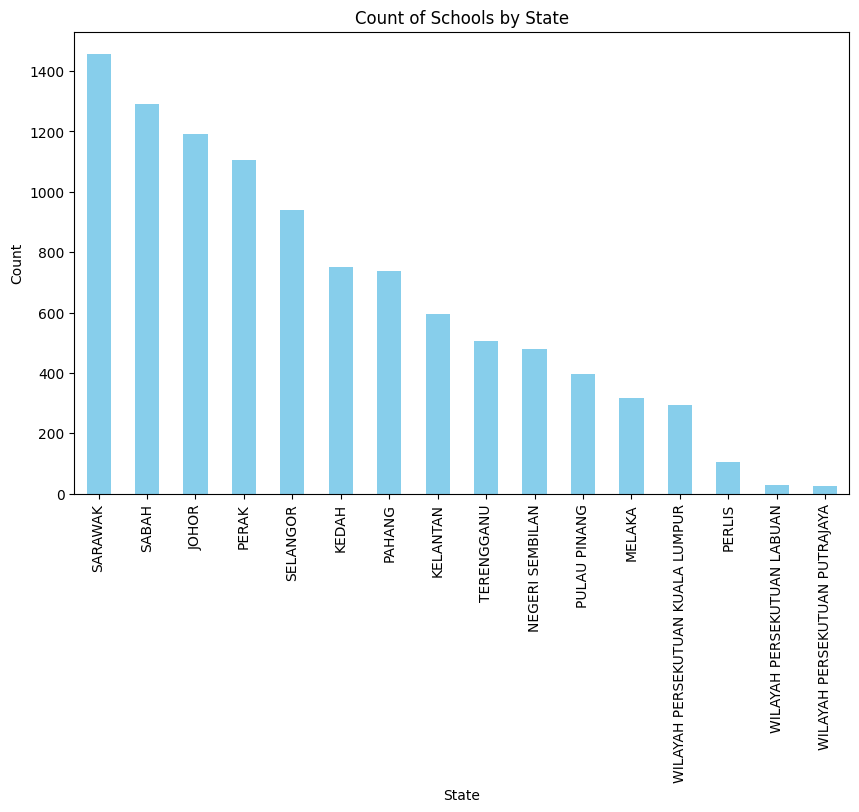

In [ ]:
state_counts = schools['STATE'].value_counts()

plt.figure(figsize=(10, 6))
state_counts.plot(kind='bar', color='skyblue')
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Count of Schools by State')
plt.xticks(rotation=90)
plt.show()

## Bivariate Analysis

### Relationship between Students and Teachers

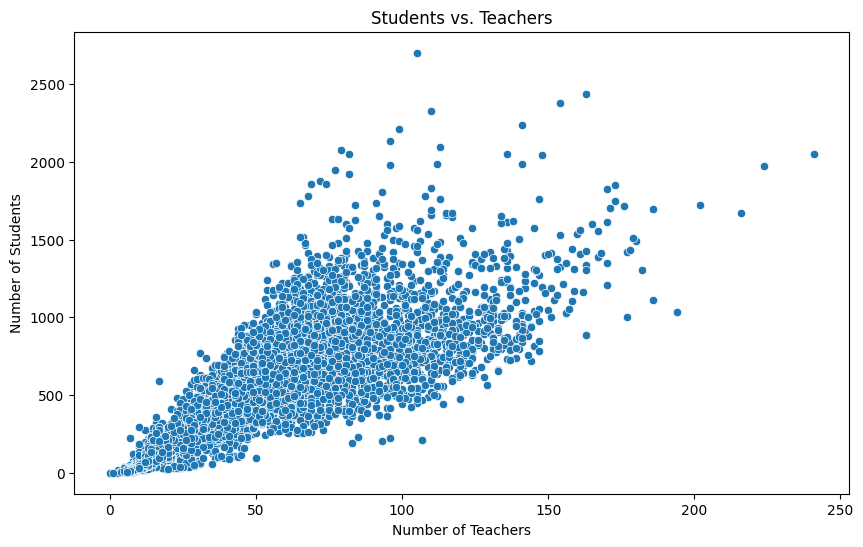

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=schools, x='TEACHER', y='STUDENTS')
plt.title('Students vs. Teachers')
plt.xlabel('Number of Teachers')
plt.ylabel('Number of Students')
plt.show()

### Relationship between Students and Classrooms

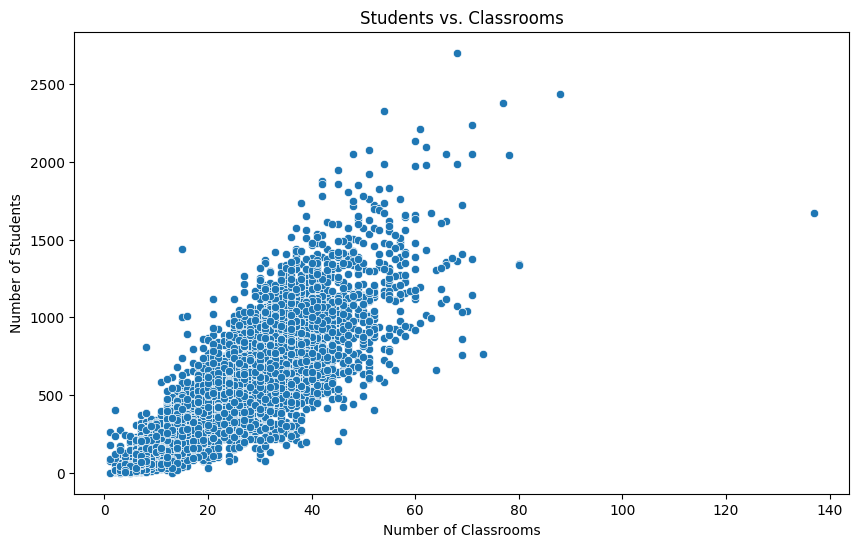

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=schools, x='CLASSROOM', y='STUDENTS')
plt.title('Students vs. Classrooms')
plt.xlabel('Number of Classrooms')
plt.ylabel('Number of Students')
plt.show()

### Relationship between Teachers and Classrooms

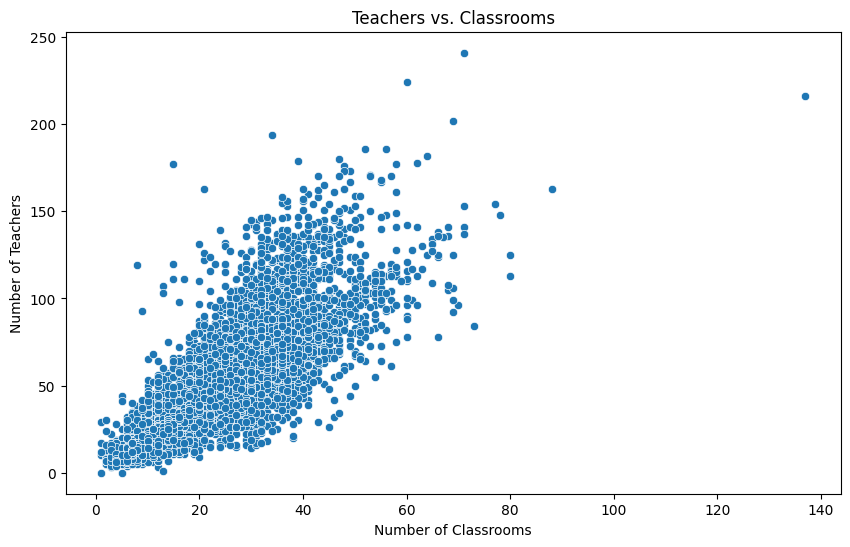

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=schools, x='CLASSROOM', y='TEACHER')
plt.title('Teachers vs. Classrooms')
plt.xlabel('Number of Classrooms')
plt.ylabel('Number of Teachers')
plt.show()

# Prediction



## Linear Regression on Student Count

* Objective: To estimate the number of students in a school based on the number of teachers and the number of classrooms for strategic resource allocation, ensuring schools have an adequate number of student:teacher and student:classroom ratio

In [ ]:
x = schools[['TEACHER', 'CLASSROOM']]
y = schools[['STUDENTS']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

* The target variable (dependent variable) is Students
* The features (independent variables) are Teacher and Classroom
* The data is split into 70% of training and 30% of testing
* A linear regression model is used to train the data

In [ ]:
intercept_pd = pd.DataFrame(lm.intercept_, columns=["Intercept"])
intercept_pd.index = ['Intercept']
intercept_pd

,Intercept
Intercept,-48.811389


* The intercept of the model is -48.81
* If both the number of teachers and classrooms are 0, the model would predict -48.81 students
* The negative intercept is a result of the linear regression calculation and should not be interpreted literally as the regression line is adjusted to fit the data better
* In real-world context, we can logically imply that if there are 0 teachers and classrooms, there would be 0 students

In [ ]:
coef_pd = pd.DataFrame(lm.coef_.reshape(-1,1), x.columns, columns=["Coefficient"])
coef_pd

,Coefficient
TEACHER,4.216677
CLASSROOM,15.185566


* The coefficient for teacher and classroom is 4 and 15 respectively
* For each additional teacher, it is associated with an increase of approximately 4 students
* For each additional classroom, it is associated with an increase of approximately 15 students

In [ ]:
predictions = lm.predict(x_test)

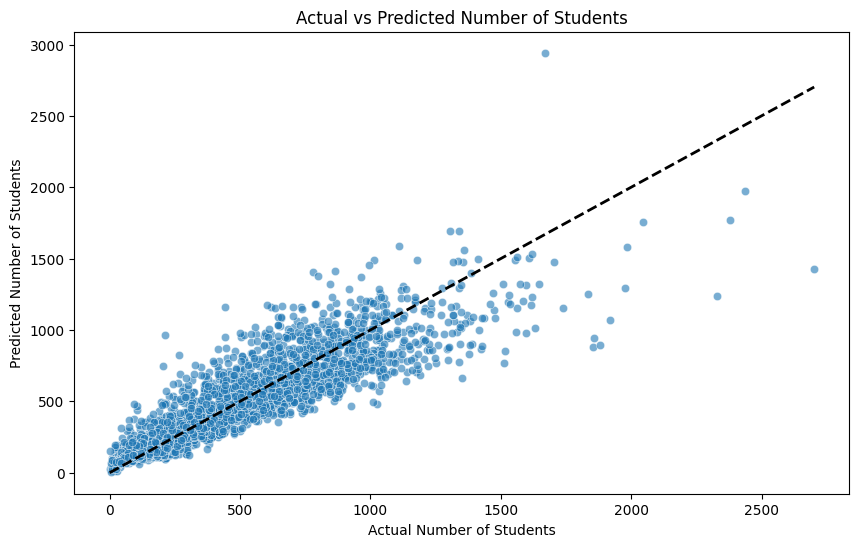

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.6, edgecolor='w', linewidth=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Number of Students')
plt.ylabel('Predicted Number of Students')
plt.title('Actual vs Predicted Number of Students')
plt.show()

* The scatter plot shows how well the model's predictions align with the actual values
* The points closer to the diagonal line indicates accurate prediction
* The high concentration of points along the line suggests a good model performance

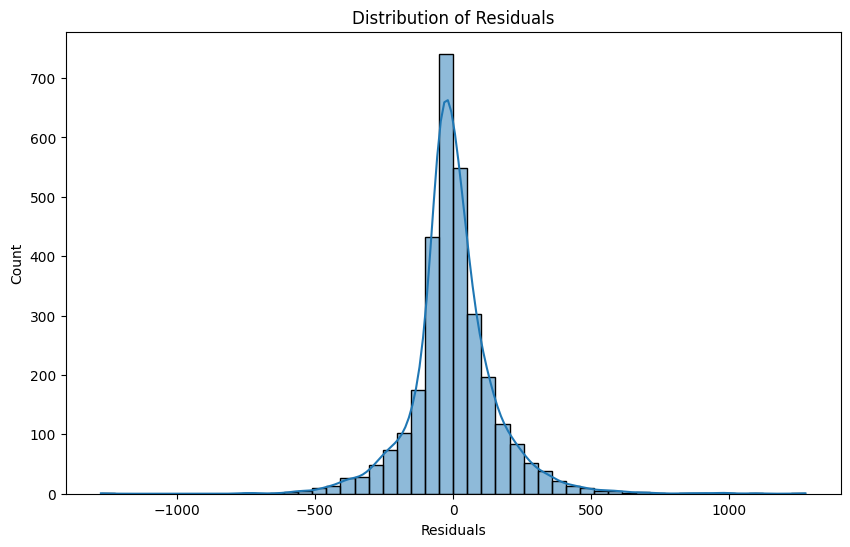

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot((y_test - predictions).values.flatten(), bins=50, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

* The distribution plot of residuals assess the model's prediction errors of the differences between actual and predicted values
* The residuals are normally distributed around zero, indicating unbiased predictions and suggest that the model's predictions are quite accurate

In [ ]:
rsquared = lm.score(x_train, y_train)
rsquared

0.8119303376774538

* The R-squared value is 0.81, which means that 81% of the variability in student numbers is explained by the model
* This suggests a strong relationship between the independent variables (teachers and classrooms) and the dependent variable (students)


In [ ]:
metrics.mean_absolute_error(y_test, predictions)

103.77018524781039

* The Mean Absolute Error (MAE) is 103.77, which means that the average absolute difference between the predicted and actual values is apporximately 104 students
* On average, the prediction error is off by about 104 students

In [ ]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

155.96097036863642

* Root Mean Squared Error (RMSE) is used instead of Mean Squared Error (MSE) because of the disparity where the total number of students is exceptionally high in some schools
* The RMSE is 155.96, which means that the model's prediction error is about 156 students, indicating how much the predicted values deviate from the actual values

## Linear Regression on Teacher Count

* Objective: To predict the number of teachers required based on the number of students, and the number of classrooms for future development of schools, ensuring a strategic plan for future needs

In [ ]:
x = schools[['STUDENTS', 'CLASSROOM']]
y = schools[['TEACHER']]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)
lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

* The target variable (dependent variable) is Teacher
* The features (independent variables) are Students and Classroom
* The data is split into 70% of training and 30% of testing
* A linear regression model is used to train the data

In [ ]:
intercept_pd = pd.DataFrame(lm.intercept_, columns=["Intercept"])
intercept_pd.index = ['Intercept']
intercept_pd

,Intercept
Intercept,0.484701


* The intercept of the model is 0.48
* If both the number of students and classrooms are 0, the model would predict 0.48 teachers
* The negative intercept is a result of the linear regression calculation and should not be interpreted literally as the regression line is adjusted to fit the data better
* In real-world context, we can logically imply that if there are 0 students and classrooms, there would be 0 teachers

In [ ]:
coef_pd = pd.DataFrame(lm.coef_.reshape(-1,1), x.columns, columns=["Coefficient"])
coef_pd

,Coefficient
STUDENTS,0.038414
CLASSROOM,1.210919


* The coefficient for students and classroom is 0 and 1 respectively
* For each additional student, it is associated with an increase of approximately 0 teachers
* For each additional classroom, it is associated with an increase of approximately 1 teacher

In [ ]:
predictions = lm.predict(x_test)

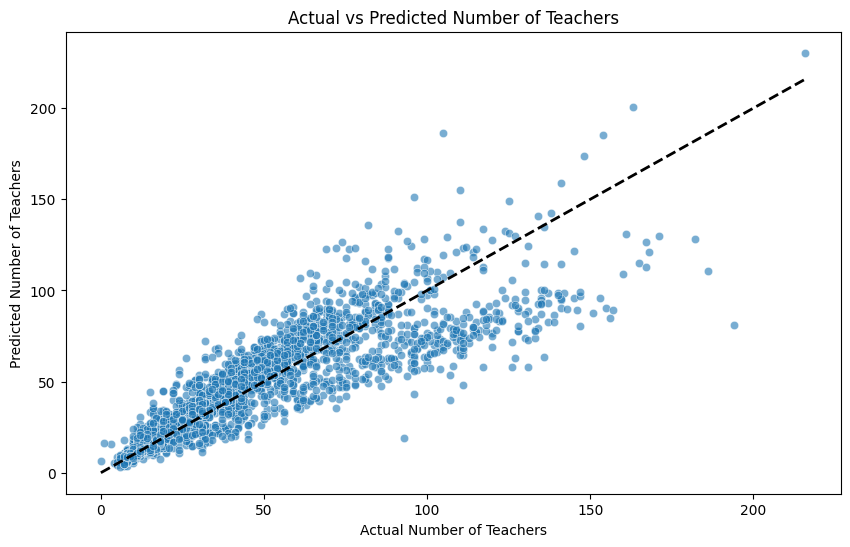

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions, alpha=0.6, edgecolor='w', linewidth=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Number of Teachers')
plt.ylabel('Predicted Number of Teachers')
plt.title('Actual vs Predicted Number of Teachers')
plt.show()

* The scatter plot shows how well the model's predictions align with the true values
* The points closer to the diagonal line indicates accurate prediction
* The high concentration of points along the line suggests a good model performance

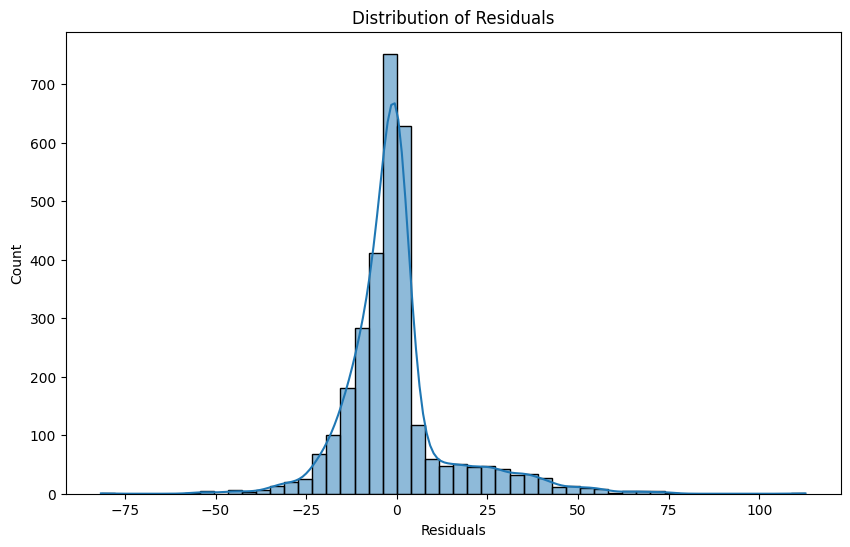

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot((y_test - predictions).values.flatten(), bins=50, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

* The distribution plot of residuals assess the model's prediction errors of the differences between actual and predicted values
* The residuals are normally distributed around zero, indicating unbiased predictions and suggest that the model's predictions are quite accurate

In [ ]:
rsquared = lm.score(x_train, y_train)
rsquared

0.7887010761114535

* The R-squared value is 0.79, which means that 79% of the variability in teacher count is explained by the model
* This suggests a strong relationship between the independent variables (students and classrooms) and the dependent variable (teacher)


In [ ]:
metrics.mean_absolute_error(y_test, predictions)

9.232742045354227

* The Mean Absolute Error (MAE) is 9.23, which means that the average absolute difference between the predicted and actual values is apporximately 9 teachers
* On average, the prediction error is off by about 9 teachers

In [ ]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

14.765184654662358

* Root Mean Squared Error (RMSE) is used instead of Mean Squared Error (MSE) because MSE gives more weight to larger errors
* The RMSE is 14.77, which means that the model's prediction error is about 15 teachers, indicating how much the predicted values deviate from the actual values

# Conclusion

* The first model suggests that increasing the number of classrooms and teachers will significantly increase the number of students a school can accommodate
* This highlights the need for an adequate number of classrooms to support a growing student population


* The second model indicates that both the number of students and classrooms are critical factors in determining the number of teachers needed
* Schools with more classrooms and students require proportionally more teachers